  # Analysis over IPL Datset using Python+SQL

#Question 01:Find the Top 5 batsman from each team who scored most runs.

In [1]:
import pandas as pd
import mysql.connector
mydb=mysql.connector.connect(host="localhost",
                             database="mydatabase",
                             user="root",
                             password="root")
cursor=mydb.cursor()
SQL_statement='''WITH IPL_Ranking as(
                        select batting_team,batsman,sum(batsman_runs) as batsman_runs,
                        dense_rank() OVER(partition by batting_team order by sum(batsman_runs) desc) as 'Player_Rank'
                        from ipl_ball_by_ball group by 1,2
                        )
                 select * from IPL_Ranking Where Player_rank <= %s'''

cursor.execute(SQL_statement,(5,))
df=pd.DataFrame(cursor.fetchall(),columns=['Team_name','Batsman','Total_Run','Ranking'])
df.head(10)

,Team_name,Batsman,Total_Run,Ranking
0,Chennai Super Kings,SK Raina,4527,1
1,Chennai Super Kings,MS Dhoni,4058,2
2,Chennai Super Kings,F du Plessis,2088,3
3,Chennai Super Kings,MEK Hussey,1768,4
4,Chennai Super Kings,M Vijay,1708,5
5,Deccan Chargers,AC Gilchrist,1220,1
6,Deccan Chargers,RG Sharma,1170,2
7,Deccan Chargers,S Dhawan,969,3
8,Deccan Chargers,A Symonds,839,4
9,Deccan Chargers,HH Gibbs,805,5


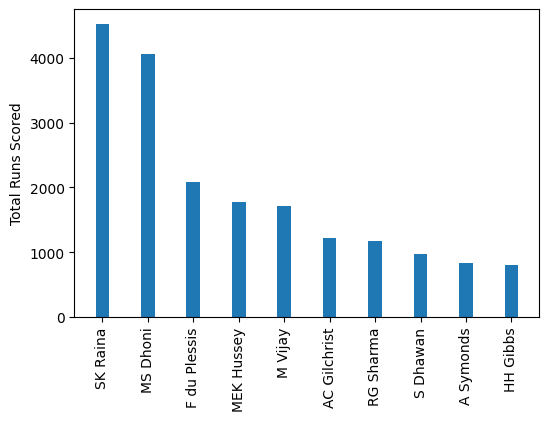

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.bar(df['Batsman'].head(10).to_list(),df['Total_Run'].head(10).to_list(),width=0.3)
plt.ylabel("Total Runs Scored")
plt.xticks(rotation=90)
plt.show()

In [3]:
mydb.close()

In [4]:
#importing some required python library
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Lets read the dataset from csv file
ipl_data=pd.read_csv(r"D:\Data_Set\IPL\IPL Ball-by-Ball 2008-2020.csv")
ipl_data.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [2]:
#ipl_data.info()

As we can see all the data types in csv file is as expected.

In [7]:
#Lets check about data duplicacy
ipl_data.duplicated().sum()

1

In [8]:
ipl_data[ipl_data.duplicated(keep=False)]

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
38363,419152,1,3,1,SR Tendulkar,C Madan,PJ Sangwan,1,0,1,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Daredevils
38372,419152,1,3,1,SR Tendulkar,C Madan,PJ Sangwan,1,0,1,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Daredevils


In [9]:
#As we can see there are two column with data.. so need to remove duplicates
ipl_data.drop_duplicates(inplace=True)
ipl_data.duplicated().sum()

0

In [10]:
ipl_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183972
player_dismissed    183972
fielder             186683
extras_type         183234
batting_team             0
bowling_team           191
dtype: int64

In [11]:
ipl_data[ipl_data['bowling_team'].isnull()]

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
57048,501265,1,0,1,NV Ojha,DA Warner,AC Thomas,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,NaN
57049,501265,1,0,2,DA Warner,NV Ojha,AC Thomas,0,1,1,0,0,NaN,NaN,NaN,legbyes,Delhi Daredevils,NaN
57050,501265,1,1,1,DA Warner,NV Ojha,JP Faulkner,0,1,1,0,0,NaN,NaN,NaN,legbyes,Delhi Daredevils,NaN
57051,501265,1,1,2,NV Ojha,DA Warner,JP Faulkner,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,NaN
57052,501265,1,1,3,NV Ojha,DA Warner,JP Faulkner,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115654,829763,1,7,3,AB de Villiers,Mandeep Singh,STR Binny,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,NaN
115655,829763,1,8,6,AB de Villiers,Mandeep Singh,SR Watson,2,0,2,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,NaN
115656,829763,1,9,1,Mandeep Singh,AB de Villiers,STR Binny,4,0,4,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,NaN
115657,829763,1,8,4,AB de Villiers,Mandeep Singh,SR Watson,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,NaN


In [12]:
ipl_data.shape

(193467, 18)

In [13]:
(191/193467)*100

0.09872484713155216

As we can see there is only 0.098% of data in bowling team is null which can be ignored.

In [3]:
# lets fetch the data from tables to see the structure

In [17]:
import pandas as pd
import mysql.connector
mydb=mysql.connector.connect(host="localhost",
                             database="mydatabase",
                             user="root",
                             password="root")
cursor=mydb.cursor()
cursor.execute('''Select * from ipl_ball_by_ball''')
IPL_df=pd.DataFrame(cursor.fetchall(),columns=ipl_data.columns)
mydb.close()
IPL_df.head(5)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore


Q. Calculate the run scored by Virat Kohli till his 25th, 50th & 100th match etc. 

In [19]:
mydb=mysql.connector.connect(host="localhost",
                             database="mydatabase",
                             user="root",
                             password="root")
cursor=mydb.cursor()
SQL_statement='''
        WITH CTE_Run_scored as(
                    select concat('Match-',row_number() Over(order by id)) as Match_No,
                    sum(batsman_runs) as 'Run_scored'
                    from ipl_ball_by_ball
                    where batsman='V Kohli'
                    group by id)
       Select * from (select Match_No,Run_scored,
       sum(run_scored) over(rows between unbounded preceding and  current row) as 'cumulative_run'
       from CTE_Run_scored) temp
       where temp.Match_No IN ("Match-25","Match-50","Match-75","Match-100","Match-125","Match-150")
       '''
cursor.execute(SQL_statement)
cummulative_run_df=pd.DataFrame(cursor.fetchall(),columns=["Match_No","Run_scored","cumulative_run"])
cummulative_run_df

,Match_No,Run_scored,cumulative_run
0,Match-25,7,411
1,Match-50,11,1131
2,Match-75,1,1868
3,Match-100,13,2645
4,Match-125,7,3705
5,Match-150,8,4775


In [20]:
cummulative_run_df['Match']=cummulative_run_df['Match_No'].apply(lambda x:x[6:])
cummulative_run_df.drop('Match',axis=1,inplace=True)
cummulative_run_df

,Match_No,Run_scored,cumulative_run
0,Match-25,7,411
1,Match-50,11,1131
2,Match-75,1,1868
3,Match-100,13,2645
4,Match-125,7,3705
5,Match-150,8,4775


In [21]:
cummulative_run_df

,Match_No,Run_scored,cumulative_run
0,Match-25,7,411
1,Match-50,11,1131
2,Match-75,1,1868
3,Match-100,13,2645
4,Match-125,7,3705
5,Match-150,8,4775


#Let's plot the graph for virat kohli performance.

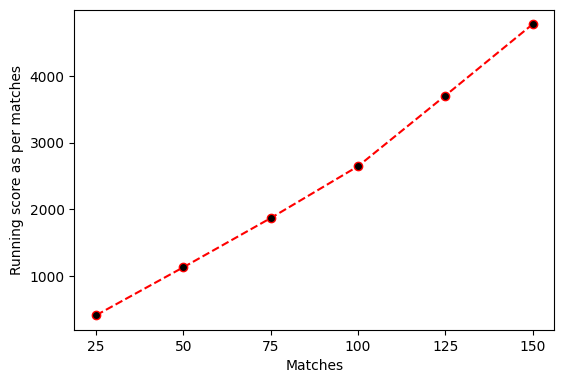

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=(6,4))
axes=fig.add_axes([0.1,0.1,0.8,0.8])
cummulative_run_df['Match']=cummulative_run_df['Match_No'].apply(lambda x:x[6:])
axes.plot(cummulative_run_df['Match'].to_list(),cummulative_run_df['cumulative_run'].to_list(),color='red',linestyle='--',marker='o',markerfacecolor='k')
plt.xlabel("Matches")
plt.ylabel('Running score as per matches')
plt.show()

#Q.What is the performance of Suresh Raina in his 50th,100th and 150th match.

In [23]:
sql_statement='''
                  with CTE_Total_run as(
                        select batsman,concat('Match-',row_number() over(order by id)) as Match_No,
                        sum(batsman_runs) as Run_scored
                        from ipl_ball_by_ball
                        where batsman='SK Raina'
                        group by id
                        )
                 Select * from(
                        select *,Round(avg(Run_scored) OVER(rows between unbounded preceding and current row),2) as avg_each_match
                        from CTE_Total_run) temp
                        where temp.Match_No="Match-50"
                        OR temp.Match_No="Match-100"
                        OR temp.Match_No="Match-150"
                        '''
cursor.execute(sql_statement)
running_avg_raina=pd.DataFrame(cursor.fetchall(),columns=["Batsman","Run_scored","Match_No","avg_each_match"])
running_avg_raina

,Batsman,Run_scored,Match_No,avg_each_match
0,SK Raina,Match-50,2,29.88
1,SK Raina,Match-100,14,29.01
2,SK Raina,Match-150,32,29.15


Q.Let's find the venue for IPL matches. like match played at different venue.

In [24]:
import pandas as pd
import mysql.connector
mydb=mysql.connector.connect(host="localhost",
                             database="mydatabase",
                             user="root",
                             password="root")

mycursor=mydb.cursor()
mycursor.execute('''Select * from ipl_matches''')
ipl_matches=pd.read_csv(r"D:\Data_Set\IPL\IPL Matches 2008-2020.csv")
ipl_matches=pd.DataFrame(mycursor.fetchall(),columns=ipl_matches.columns)
mydb.close()
ipl_matches.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,N,NA,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,N,NA,MR Benson,SL Shastri


In [25]:
top_played_venue=ipl_matches.groupby(['venue','id']).count().droplevel(level=1).index.value_counts().head()
top_played_venue=top_played_venue.reset_index()
top_played_venue.rename(columns={'count':'Total_match'},inplace=True)
top_played_venue

,venue,Total_match
0,Eden Gardens,77
1,Wankhede Stadium,72
2,Feroz Shah Kotla,72
3,"Rajiv Gandhi International Stadium, Uppal",63
4,M Chinnaswamy Stadium,62


In [26]:
type(top_played_venue)

pandas.core.frame.DataFrame

In [5]:
#Q. Find the team who played most number of matches in IPL.

In [36]:
mydb=mysql.connector.connect(host="localhost",
                             database="mydatabase",
                             user="root",
                             password="root")

mycursor=mydb.cursor()
sql_statement='''
                with cte_matches as (
                        select team1 as team from ipl_matches
                        UNION ALL
                        select team2 as team from ipl_matches)
select team,count(1) total_played from cte_matches group by team order by 2 desc'''
mycursor.execute(sql_statement)
total_match_df = pd.DataFrame(mycursor.fetchall(),columns=['Team Name','Total Played Matches'])
total_match_df.head(3)

,Team Name,Total Played Matches
0,Mumbai Indians,199
1,Royal Challengers Bangalore,189
2,Kolkata Knight Riders,188


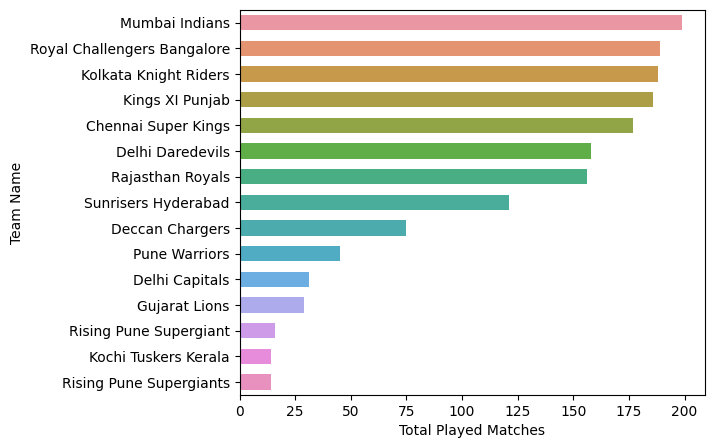

In [43]:
plt.figure(figsize=(6,5))
sns.barplot(data=total_match_df,x='Total Played Matches',y='Team Name',orient='h',width=0.6)
plt.show()

#Q. How many matches won,loss and their winning ratio by particular team.

In [44]:
sql_statement='''with CTE_matches as(
                        select team1 as team,winner from ipl_matches
                        union all
                        select team2 as team,winner from ipl_matches
                        )
                 select team, count(case when team = winner then 1 end) as total_won,
                        count(case when team <> winner then 1 end) as total_loss
                 from CTE_matches
                 group by team order by 2 desc'''
mycursor.execute(sql_statement)
won_loss_df = pd.DataFrame(mycursor.fetchall(),columns=['Team','Won','Lose'])
won_loss_df.head()

,Team,Won,Lose
0,Mumbai Indians,118,81
1,Chennai Super Kings,106,71
2,Kolkata Knight Riders,98,90
3,Royal Challengers Bangalore,89,100
4,Kings XI Punjab,85,101


In [49]:
won_loss_df['Winning Ratio'] = round((won_loss_df['Won']/(won_loss_df['Lose'] + won_loss_df['Won']))*100,2)
won_loss_df

,Team,Won,Lose,Winning Ratio
0,Mumbai Indians,118,81,59.30
1,Chennai Super Kings,106,71,59.89
2,Kolkata Knight Riders,98,90,52.13
3,Royal Challengers Bangalore,89,100,47.09
4,Kings XI Punjab,85,101,45.70
5,Rajasthan Royals,79,77,50.64
6,Delhi Daredevils,67,91,42.41
7,Sunrisers Hyderabad,65,56,53.72
8,Deccan Chargers,29,46,38.67
9,Delhi Capitals,17,14,54.84


#Q.Find the player who have most IPL centuries in IPL matches.

In [1]:
import pandas as pd
import mysql.connector
mydb=mysql.connector.connect(host="localhost",
                             database="mydatabase",
                             user="root",
                             password="root")

mycursor=mydb.cursor()
statement='''WITH CTE_Run_scored as(
                    select id Match_id,batsman,
                    sum(batsman_runs) as 'Run_scored'
                    from ipl_ball_by_ball
                    group by id,batsman)
       select * from (Select batsman,count(Case when run_scored>=100 THEN 1 end) as total_centurie from CTE_Run_scored group by batsman order by 2 desc) temp
       where temp.total_centurie>0'''
mycursor.execute(statement)
most_centuries_df = pd.DataFrame(mycursor.fetchall(),columns=['Player','Total Centuries'])
most_centuries_df.head()

,Player,Total Centuries
0,CH Gayle,6
1,V Kohli,5
2,SR Watson,4
3,DA Warner,4
4,AB de Villiers,3


In [2]:
mydb.close()

#Q.find Orange cap holder(the player who scored most of runs in a season) in each season of IPL matches

In [4]:
import pandas as pd
import mysql.connector
mydb=mysql.connector.connect(host='localhost',
                             database='mydatabase',
                             user='root',
                             password='root')
mycursor=mydb.cursor()
sql_statement='''
                 with cte_ipl as(
                      select ball.id,substr(m.date,1,4) as season,ball.batsman,ball.batsman_runs
                      from ipl_matches m
                      inner join ipl_ball_by_ball ball
                      on m.id=ball.id
                      )
                select season,Player,run_scored from(
                                            select season,
                                            batsman as Player,
                                            sum(batsman_runs) as run_scored,
                                            dense_rank() over(partition by season order by sum(batsman_runs) desc) as season_rank
                                            from cte_ipl
                                            group by season,batsman) temp
                                            where temp.season_rank=1'''
mycursor.execute(sql_statement)
orange_cap_holder_df=pd.DataFrame(mycursor.fetchall(),columns=['Season','Player','Season_wise_Runs'])
orange_cap_holder_df.head()

,Season,Player,Season_wise_Runs
0,2008,SE Marsh,616
1,2009,ML Hayden,572
2,2010,SR Tendulkar,618
3,2011,CH Gayle,608
4,2012,CH Gayle,733


#Q.Most run conceded by a bowler in an inning. also their economy rate.

In [42]:
sql_statement='''
select bowler as Player,
       Runs,
       concat(total_ball_thrown div 6,'.', total_ball_thrown mod 6) as Overs,
       round((Runs/total_ball_thrown)*6,2) as Economy,
       Against,
       substr(m.date,1,4) as Year
       from(
            select id,
                   bowler,
                   (sum(batsman_runs)+sum(Case when extras_type IN ('wides','noballs') then 1 else 0 end)) as Runs,
                   batting_team as Against,
                   count(case when extras_type not in ('wides','noballs','legbyes') then 1 end) as total_ball_thrown
                   from ipl_ball_by_ball
                   group by bowler,id,batting_team
                   order by 3 desc)temp
        inner join ipl_matches m
        on temp.id=m.id
        order by Runs desc
'''
mycursor.execute(sql_statement)
most_conceded_runs_df=pd.DataFrame(mycursor.fetchall(),columns=['Player','Runs','Overs','Economy','Against','Year'])
most_conceded_runs_df.head()

,Player,Runs,Overs,Economy,Against,Year
0,Basil Thampi,70,4.0,17.50,Royal Challengers Bangalore,2018
1,I Sharma,66,4.0,16.50,Chennai Super Kings,2013
2,UT Yadav,65,4.0,16.25,Royal Challengers Bangalore,2013
3,Sandeep Sharma,65,3.5,16.96,Sunrisers Hyderabad,2014
4,S Kaul,64,4.0,16.00,Mumbai Indians,2020


In [43]:
most_conceded_runs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9483 entries, 0 to 9482
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Player   9483 non-null   object
 1   Runs     9483 non-null   object
 2   Overs    9483 non-null   object
 3   Economy  9482 non-null   object
 4   Against  9483 non-null   object
 5   Year     9483 non-null   object
dtypes: object(6)
memory usage: 444.6+ KB


#As we can see there is one null value in economy so we need to remove it then only we can plot horizontal bar.

In [46]:
most_conceded_runs_df.isna().sum()

Player     0
Runs       0
Overs      0
Economy    1
Against    0
Year       0
dtype: int64

In [47]:
most_conceded_runs_df.dropna(axis=1,inplace=True)

In [48]:
most_conceded_runs_df.isna().sum()

Player     0
Runs       0
Overs      0
Against    0
Year       0
dtype: int64

In [52]:
most_conceded_runs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9483 entries, 0 to 9482
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Player   9483 non-null   object
 1   Runs     9483 non-null   object
 2   Overs    9483 non-null   object
 3   Against  9483 non-null   object
 4   Year     9483 non-null   object
dtypes: object(5)
memory usage: 370.6+ KB


In [53]:
most_conceded_runs_df['Runs']=pd.to_numeric(most_conceded_runs_df['Runs'])

In [54]:
most_conceded_runs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9483 entries, 0 to 9482
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   9483 non-null   object 
 1   Runs     9483 non-null   float64
 2   Overs    9483 non-null   object 
 3   Against  9483 non-null   object 
 4   Year     9483 non-null   object 
dtypes: float64(1), object(4)
memory usage: 370.6+ KB


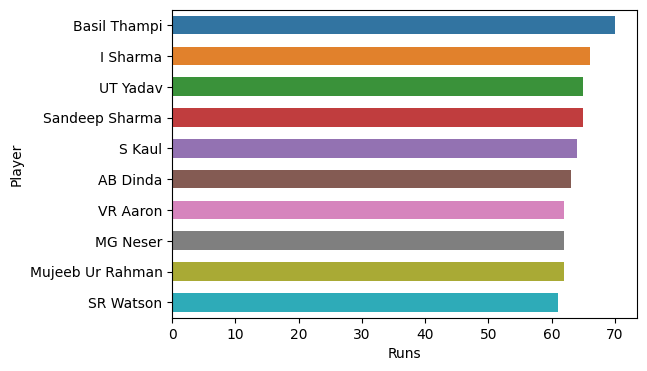

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot(data=most_conceded_runs_df.head(10),x='Runs',y='Player',orient='h',width=0.6)
plt.show()

In [51]:
most_conceded_runs_df.isnull().sum()

Player     0
Runs       0
Overs      0
Against    0
Year       0
dtype: int64

#Q.find the bowler who did Most number of Dot Balls.

In [2]:

import pandas as pd
import mysql.connector
mydb=mysql.connector.connect(host='localhost',
                            database='mydatabase',
                            user='root',
                            password='root')
mycursor=mydb.cursor()
sql_statement='''
                select bowler, sum(dot_ball) as total_dot_ball from(
                        select id,bowler,count(case when total_runs=0 then 1 end) as dot_ball
                        from ipl_ball_by_ball group by id,bowler
                        )temp
       group by bowler order by 2 desc
       '''
mycursor.execute(sql_statement)
dot_ball_df = pd.DataFrame(mycursor.fetchall(),columns=['Bowler','Total_dot_ball'])
dot_ball_df.head()

,Bowler,Total_dot_ball
0,Harbhajan Singh,1244
1,R Ashwin,1166
2,B Kumar,1155
3,SL Malinga,1144
4,PP Chawla,1137


In [3]:
mydb.close()

#Q.Most run in powerplay with wicket,against,batting_team,seson by partcular team.

In [5]:
import pandas as pd
import mysql.connector
mydb=mysql.connector.connect(host='localhost',
                            database='mydatabase',
                            user='root',
                            password='root')
mycursor=mydb.cursor()
sql_statement='''
                with CTE_ipl as(
                        SELECT id,inning,batting_team,SUM(CASE WHEN current_over <= 5 THEN total_runs END) AS total_score,
                               count(Case WHEN is_wicket=1 and current_over<=5 THEN 1 end) as total_wicket,
                               bowling_team as opposition FROM ipl_ball_by_ball
                               GROUP BY id , inning , batting_team,bowling_team
                        )

                select substr(m.date,1,4) as season, ipl.batting_team,
                    concat(ipl.total_score,"/",ipl.total_wicket) as "Powerplay Score",
                    ipl.opposition
                    from cte_ipl ipl inner join ipl_matches m
                    on ipl.id=m.id
                    order by ipl.total_score desc'''
mycursor.execute(sql_statement)
powerplay_score_df = pd.DataFrame(mycursor.fetchall(),columns=['Year','Team','PowerPlay Score','Opposition'])
powerplay_score_df.head()

,Year,Team,PowerPlay Score,Opposition
0,2017,Kolkata Knight Riders,105/0,Royal Challengers Bangalore
1,2014,Chennai Super Kings,100/2,Kings XI Punjab
2,2015,Chennai Super Kings,90/0,Mumbai Indians
3,2011,Kochi Tuskers Kerala,87/2,Rajasthan Royals
4,2014,Kings XI Punjab,86/1,Sunrisers Hyderabad


# The End